# Dimension reduction

In [114]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)
print(y)

[5 0 4 ... 4 5 6]


## PCA

In [115]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

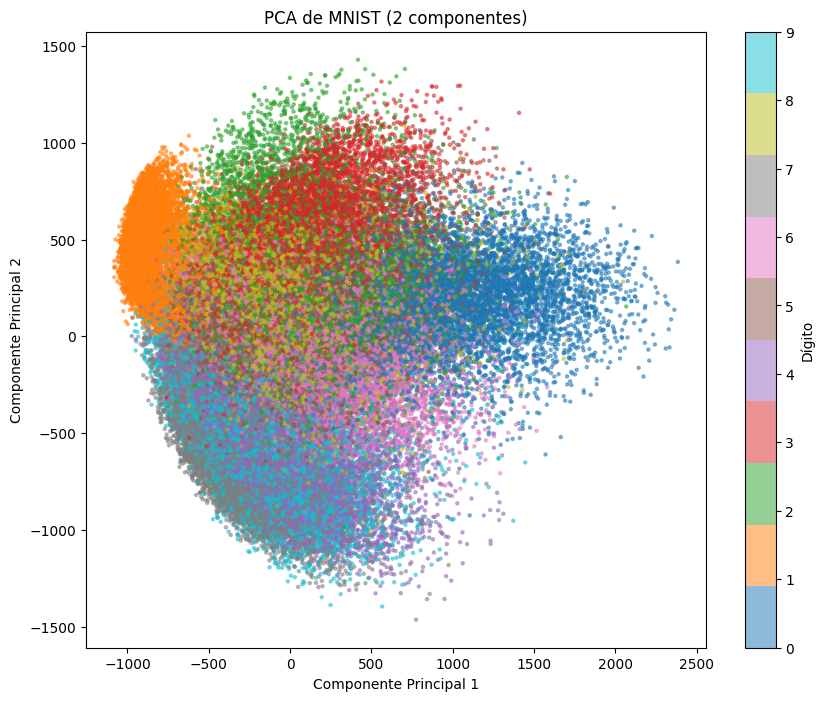

In [116]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.5, s=5)
plt.colorbar(scatter, label='Dígito')
plt.title('PCA de MNIST (2 componentes)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

## t-sne

### Step 1
Given a set of data $X$, for each element $x_i$, and each potencial neighbor, $x_j$, we define the asymmetric probability of $x_i$ to pick $x_j$ as a neighbor, $p_{j|i}$,
$$p_{j|i} := \dfrac{\exp(-d_{ij}^2)}{\sum_{k \neq i}\exp(-d_{ik}^2)}.$$
It is easy to see that $p_{i|i}=0$ and $\sum_{i,j}p_{j|i} = 1$.

The dissimilarity ($d_{ij} \geq 0$ and $d_{ii} = 0$), between two high-dimensional points, is given by
$$d_{ij}^2 := \dfrac{||x_i-x_j||^2}{2\sigma_i^2},$$
where $\sigma_i$ is the Gaussian width associated to $x_i$.

Define a simetric distribution,
$$p_{ij} = \dfrac{p_{j|i}+p_{i|j}}{2n},$$
where $n$ is the amount of data in $X$.





### Step 2
The next step is to genereate the points in the low dimensional space. PCA is a good practice for this step in the first iteration.

### Step 3
Now, compute the distance between all the points in the low dimensión,
$$\hat{d}_{ij} := ||y_i-y_j||^2.$$
In the low dimension, for the probability we use the t-Student with one degree of freedom, that is because it keeps grouped the points that are close and moderately distant points experience soft repulsion, mitigating crowding effects in the low-dimensional embedding,
$$q_{ij} := \dfrac{(1+\hat{d}_{ij}^2)^{-1}}{\sum_{k \neq l}(1+\hat{d}_{kl}^2)^{-1}}.$$

### Step 4
The aim of the embedding is to match these dsitributions as well as possible. To achive it, minimizes the a cost function, which is a sum of Kullback-Leibler divergences between the original distribution $p_{ij}$, and the induced $q_{ij}$ over the neighbors for each element of $X$,
$$C(y) := \sum_i \sum_j p_{ij} \cdot \log \dfrac{p_{ij}}{q_{ij}} = \sum_i KL(P_i || Q_i).$$
After differentiating $C$, we obtain,
$$\dfrac{\partial C}{\partial y_i} := 4 \cdot \sum_j (p_{ij}-q_{ij})(y_i-y_j)(1+||y_i-y_j||^2)^{-1}.$$
Now, with the gradient descent, we calculate the new points in the low dimension space,
$$y^{(t)}_i := y^{(t-1)}_i+\eta \dfrac{\partial C}{\partial y_i} + \alpha (t) \left( y^{(t-1)}_i - y^{(t-2)}_i \right),$$
where $\eta$ is the learning rate and $\alpha (t)$ is the moment coefficient.

### Step 5
Repeat the steps $3$ and $4$ until it converge. It is around $500-1000$ iterations.

### The Gaussian width $\sigma_i$
Suppose that $Perplexity = 30$. First of all, let $\sigma_i = 1$, so now we compute
$$p_{j|i} := \dfrac{\exp\left(-\dfrac{||x_i-x_j||^2}{2\sigma_i^2}\right)}{\sum_{k \neq i}\exp\left(-\dfrac{||x_i-x_j||^2}{2\sigma_i^2}\right)}.$$
Then, we calculate the entropy given by
$$H(P_i) = -\sum_{j\neq i} p_{j|i} \cdot \log_2 p_{j|i},$$
so then,
$$Perplexity_1 = 2^{H(P_i)}.$$
If we have that $Perplexity_1 < Perplexity$, we increase $\sigma_i$.

If we have that $Perplexity_1 > Perplexity$, we decrease $\sigma_i$.

we repeat this process, until we have that
$$|Perplexity_s - Perplexity| < \varepsilon,$$
for some $s \in \mathbb{N}$ and $\varepsilon$ is the tolerance ($\varepsilon = 10^{-5}$, for example).


In [117]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=30)
X_tsne = tsne.fit_transform(X)

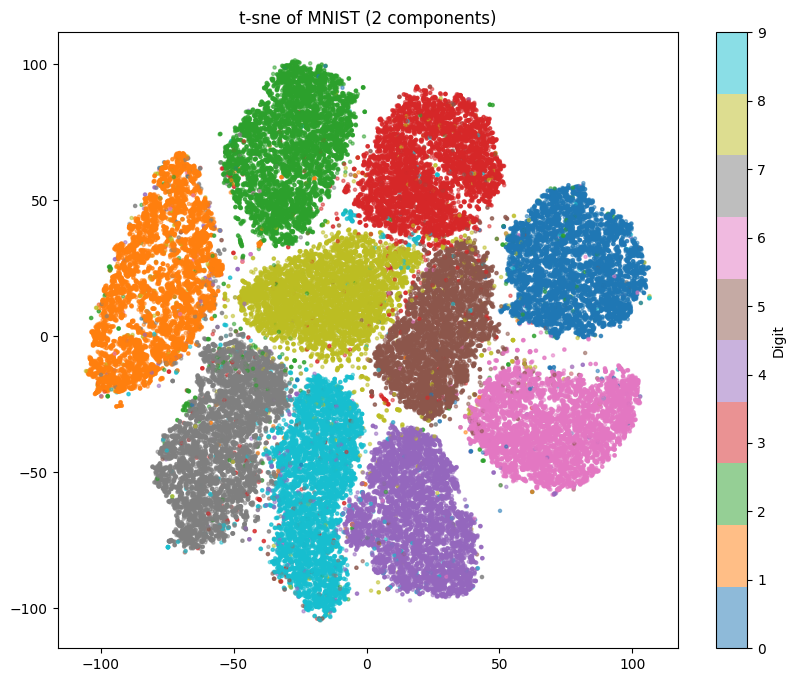

In [118]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.5, s=5)
plt.colorbar(scatter, label='Digit')
plt.title('t-sne of MNIST (2 components)')
plt.show()

In [119]:
import umap

In [120]:
reducer = umap.UMAP(n_components=2, random_state=42,n_neighbors=30)
X_umap = reducer.fit_transform(X)

c:\Users\ignac\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


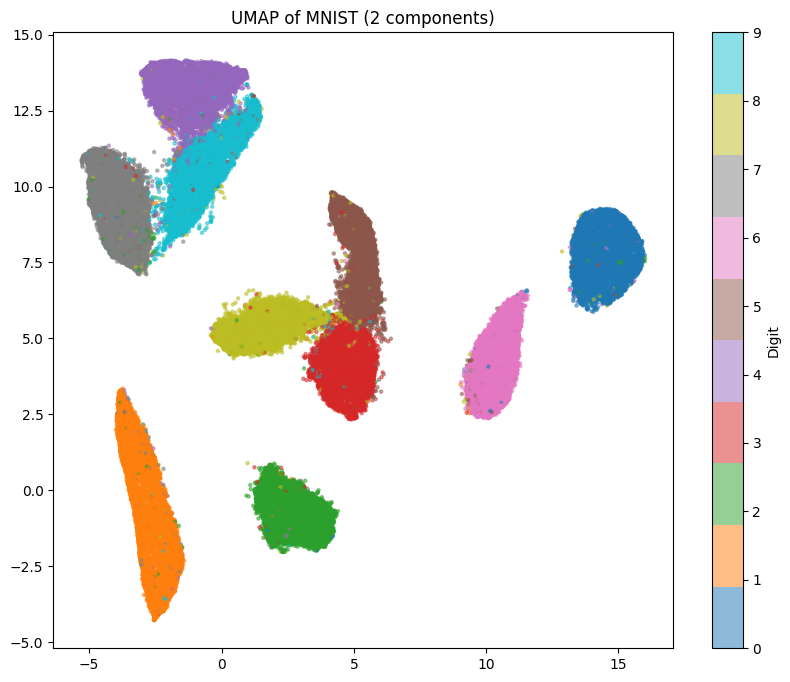

In [121]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', alpha=0.5, s=5)
plt.colorbar(scatter, label='Digit')
plt.title('UMAP of MNIST (2 components)')
plt.show()